**Understanding One-vs-all Classification**

If there are K different classes in a data-set, we will first build a model where we consider the data belonging to one class as positive, and all other classes as negative. Next, we will build another model assuming the data belonging to some other class as positive and the remaining as negative. We shall keep repeating the process until we build K different models.

In general, if there are K classes in the dataset, we need to build K different models.

# I'll attempt to use a simple algorithm like Logistic Regression to perform a complex task like Digit Recognition and get to learn about the one-vs-all technique and vectorization.

**One-vs-all using Logistic Regression**

The dataset consists of digits from 0 to 9, so we have 10 different classes here. We will make use of the **one-vs-all classification** technique by training 10 different logistic regression classifiers as mentioned above.

In [0]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
files.upload()

Saving ex3data1.mat to ex3data1.mat
Saving ex3weights.mat to ex3weights.mat


In [0]:
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

The dataset has 5000 training examples where each example is a 20-by-20 pixel grey scale image unrolled into a 400-dimensional vector thus forming a 5000 by 400 matrix X. Also note that the digit 0 is labeled as 10 while the digits 1–9 are labeled as 1–9 in the labeling vector y.

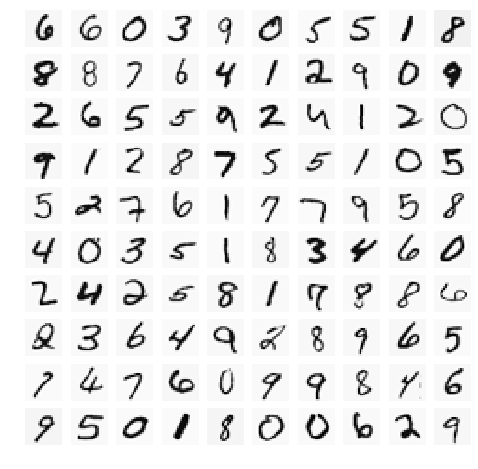

In [13]:
_, axarr = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off') 

**Adding the intercept term**

In [0]:
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X))           # Add the intercept
(m,n) = X.shape

**Vectorization**

Vectorization is the art of getting rid of explicit for-loops in code. We as data scientists work with huge amounts of data. Using for-loops while working on such huge data is highly inefficient. Hence, we make use of the vectorization technique which avoids the use of for-loops and also improves efficiency and speed of calculations.

For example, let’s consider two 1-d arrays - a and b having a million elements each. To demonstrate the speed at which Vectorization vs for-loops operate, we perform element wise multiplication of both the arrays and sum the elements in resulting array and compare the time difference.

In [15]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = 0
tic = time.time()
for i in range(1000000):
  c += a[i] * b[i]
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using for-loop " + str(1000*(toc-tic)) + " ms")

c = 0
tic = time.time()
c = np.dot(a,b)                    # No for-loops in vectorized version
toc = time.time()
print("value of c {0:.5f}".format(c))
print("time taken using vectorized operation " + str(1000*(toc-tic)) + " ms")

value of c 250041.95725
time taken using for-loop 440.11807441711426 ms
value of c 250041.95725
time taken using vectorized operation 1.4853477478027344 ms


**As we can gauge from the above output, the vectorized version is 200 times faster than a for-loop in this case.**

**Vectorizing Logistic Regression**

Using a vectorized version of Logistic Regression is much more efficient than using for-loops, particularly when the data is heavy.

Since we know that Logistic Regression uses sigmoid function, we will implement this first:

In [0]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

**Vectorized Cost Function:**

In [0]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

**Vectorized gradient:**

In [0]:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

As you can see from the above, we have avoided the use of for-loops and also added the regularization term to take care of over-fitting.

**Optimizing Parameters**

Here we will make use of an advanced numerical optimization library function called* fmin_cg* from *Scipy library* to find the optimal values for our parameters.

In [20]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n))           # Inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.009109
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.014343
         Iterations: 50
         Function evaluations: 181
         Gradient evaluations: 181
         Current function value: 0.056188
         Iterations: 50
         Function evaluations: 142
         Gradient evaluations: 142
         Current function value: 0.061955
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037407
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063583
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.020033
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033839
      

Since we have 10 different models, we needed to find the optimal parameters for each model by using a for-loop.

**Making Predictions using the One-vs-all Technique**

After training the one-vs-all classifier, we can now use it to predict the digit contained in a given image. For each input, you should compute the “probability” that it belongs to each class using the trained logistic regression classifiers. We will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,…, or K) as the prediction for the input example. We then use the returned prediction vector to find the model accuracy.

In [21]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.1

# This give us an accuracy of 95%. Impressive! Our model has done a very good job at predicting the digits.